In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
names = [
    "image_name", 
    "score", 
    "partial_faces", 
    "is_female", 
    "baby", 
    "child", 
    "teenager", 
    "youth", 
    "middle_age", 
    "senior", 
    "white", 
    "black", 
    "asian",
    "oval_face", 
    "round_face", 
    "heart_face", 
    "smiling", 
    "mouth_open", 
    "frowning", 
    "wearing_glasses", 
    "wearing_sunglasses", 
    "wearing_lipstick", 
    "tongue_out", 
    "duck_face", 
    "black_hair", 
    "blond_hair", 
    "brown_hair",
    "red_hair",
    "curly_hair",
    "straight_hair",
    "braid_hair",
    "showing_cellphone",
    "using_earphone",
    "using_mirror",
    "braces",
    "wearing_hat",
    "harsh_lighting",
    "dim_lighting"
]
types = [
    str,
    np.float16
] + [np.int8]*36
dtypes = dict(zip(names,types))
df = pd.read_csv("data/selfie_dataset.txt", sep=" ", header=None, names=names, dtype=dtypes)

In [3]:
df.head()

image_name     score  partial_faces  is_female  \
0  00a454da495e11e28a7322000a1fa414_6  3.900391              1          1   
1  00cddb96ac4c11e3a30212279ba1b65f_6  4.386719              1          1   
2  01cdd7aa1a1a11e2aaa822000a1fb0dd_6  4.242188             -1          1   
3  024696bead0c11e389d50ec42b3b1b1c_6  4.167969             -1         -1   
4  026df048221a11e2b52122000a1fa4b5_6  3.873047             -1          1   

   baby  child  teenager  youth  middle_age  senior      ...       curly_hair  \
0    -1     -1        -1      1          -1      -1      ...               -1   
1    -1     -1        -1     -1          -1      -1      ...               -1   
2    -1     -1         1     -1          -1      -1      ...               -1   
3    -1     -1         1     -1          -1      -1      ...               -1   
4    -1     -1        -1     -1           1      -1      ...               -1   

   straight_hair  braid_hair  showing_cellphone  using_earphone  using_mirror  \
0             -1          -1                 -1              -1            -1   
1             -1          -1                 -1              -1            -1   
2             -1          -1                 -1              -1            -1   
3             -1          -1                 -1              -1            -1   
4              1          -1                 -1              -1            -1   

   braces  wearing_hat  harsh_lighting  dim_lighting  
0      -1           -1              -1            -1  
1      -1           -1              -1            -1  
2      -1           -1              -1            -1  
3      -1           -1              -1            -1  
4      -1           -1              -1            -1  

[5 rows x 38 columns]

In [4]:
df.values.shape

(46836, 38)

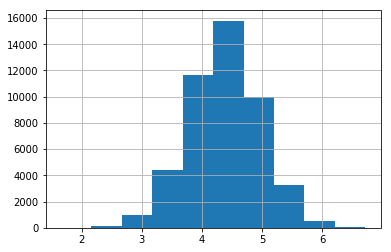

In [5]:
df.score.hist()

In [38]:
listNames = df.image_name.sample(50)
listNames.shape

(50,)

0


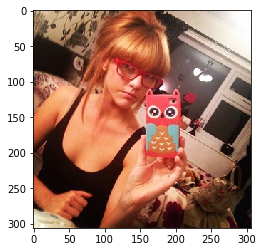

In [39]:
for i,img in enumerate(listNames):
    plt.imshow(mpimg.imread("data/images/"+img+".jpg"))
    print(i)
    plt.show()
    break

In [40]:
image = mpimg.imread("data/images/"+img+".jpg")
image.shape

(306, 306, 3)

In [58]:
def isColor(image, divs):
    diff = np.uint64(0)
    w = image.shape[0]
    h = image.shape[1]
    
    xdiv = w // (divs+1)
        
    for i in range(divs):
        x = i * xdiv + xdiv
        for j in range(w):
            rb = abs(image[x,j,0] - image[x,j,2])
            rg = abs(image[x,j,0] - image[x,j,1])
            bg = abs(image[x,j,1] - image[x,j,2])
        diff += np.uint64(rb) + np.uint64(rg) + np.uint64(bg)
    
    ydiv = h // (divs+1)
    
    for i in range(divs):
        x = i * ydiv + ydiv
        for j in range(h):
            rb = abs(image[j,x,0] - image[j,x,2])
            rg = abs(image[j,x,0] - image[j,x,1])
            bg = abs(image[j,x,1] - image[j,x,2])
        diff += np.uint64(rb) + np.uint64(rg) + np.uint64(bg)
    
    diff /= (w * divs + h * divs)
    diff /= (255 * 3)
    return diff > 0.0001

0 True


c:\users\celien.donze\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]
c:\users\celien.donze\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in ubyte_scalars


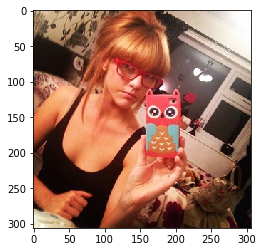

1 False


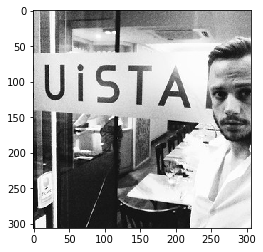

2 True


c:\users\celien.donze\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
c:\users\celien.donze\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == '':
c:\users\celien.donze\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
c:\users\celien.donze\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in ubyte_scalars


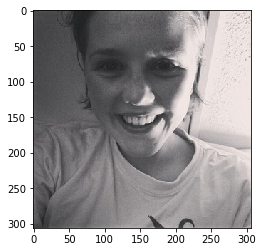

3 True


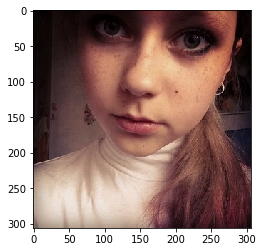

4 True


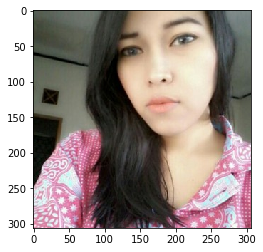

5 True


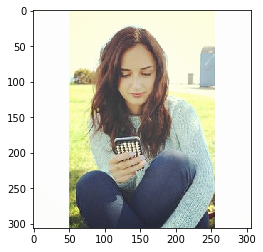

6 True


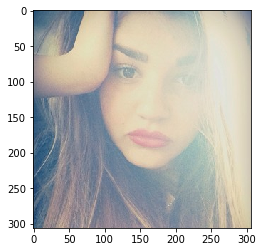

7 False


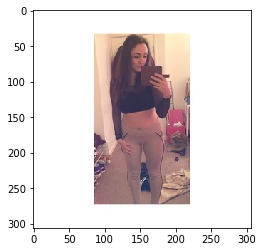

8 True


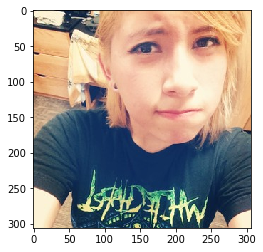

9 True


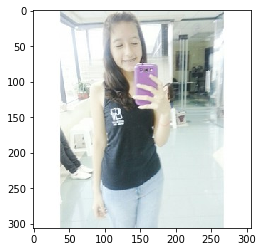

10 True


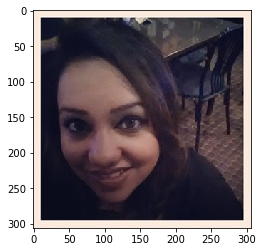

11 True


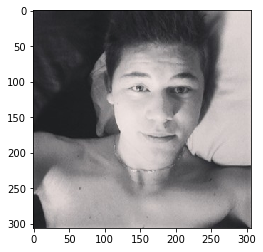

12 True


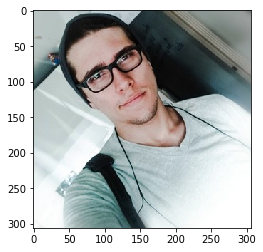

13 True


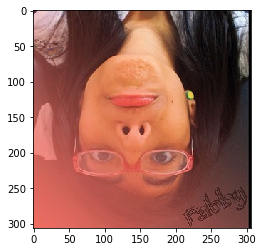

14 True


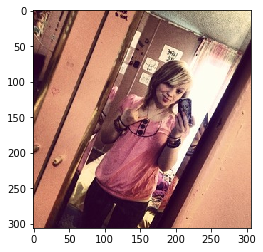

15 True


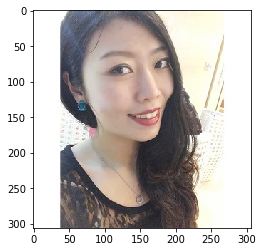

16 True


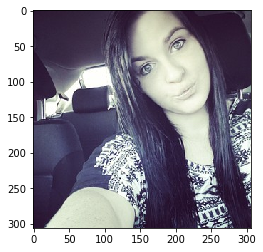

17 True


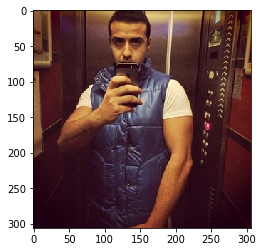

18 True


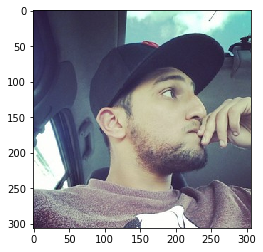

19 True


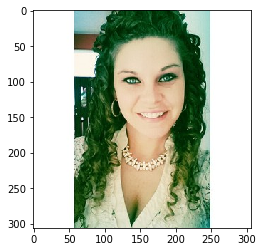

20 True


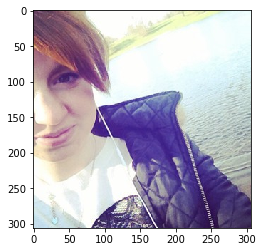

21 True


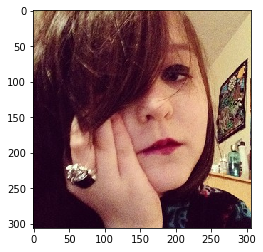

22 True


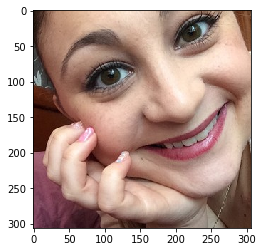

23 True


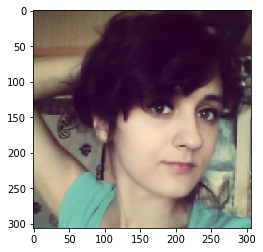

24 True


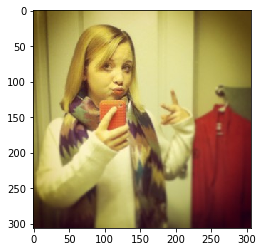

25 True


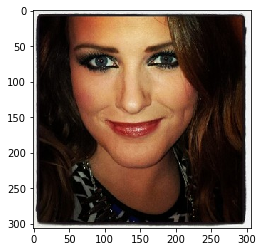

26 False


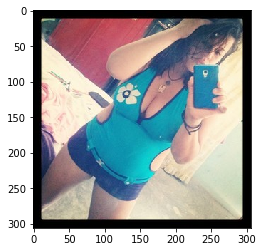

27 True


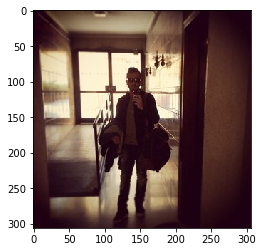

28 True


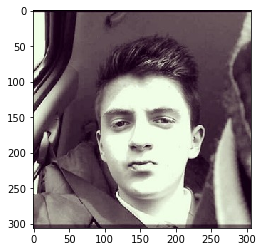

29 False


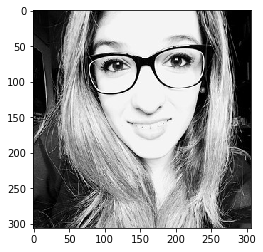

30 True


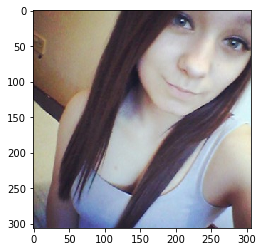

31 True


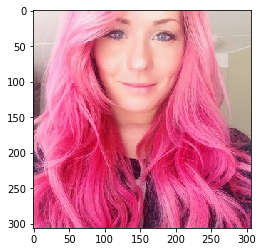

32 True


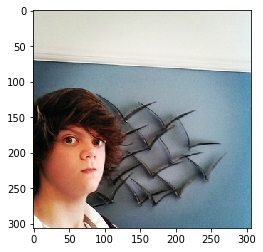

33 True


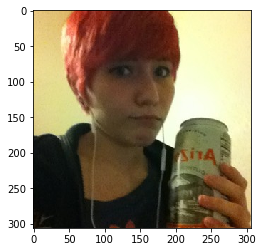

34 True


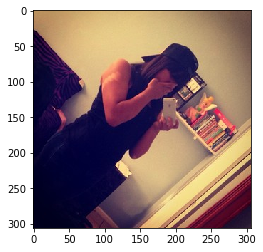

35 True


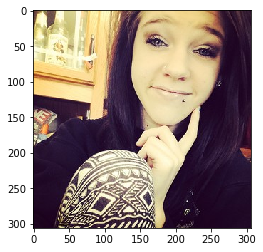

36 True


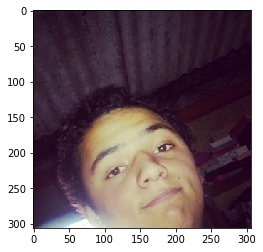

37 True


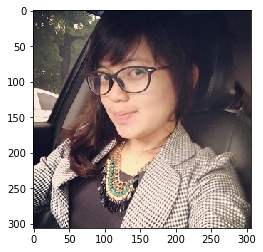

38 True


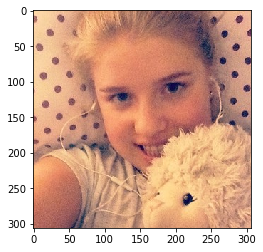

39 True


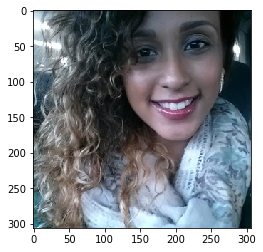

40 True


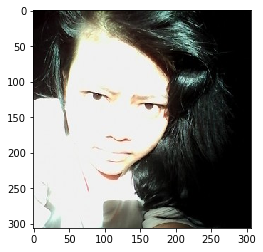

41 False


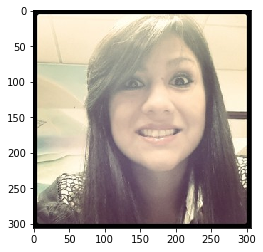

42 True


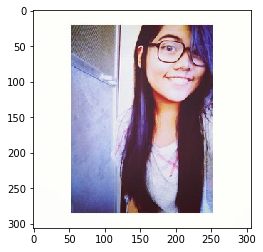

43 True


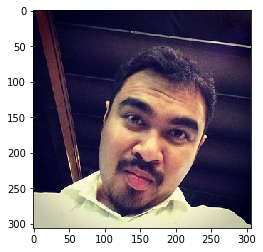

44 True


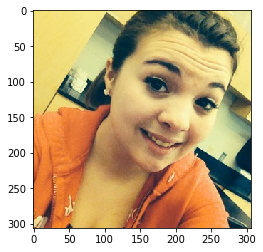

45 True


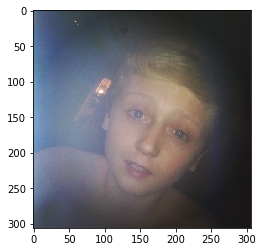

46 True


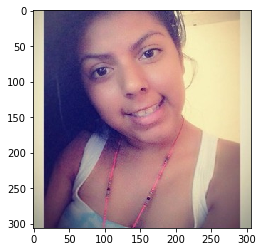

47 True


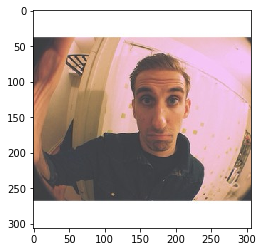

48 True


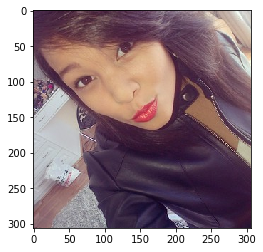

49 True


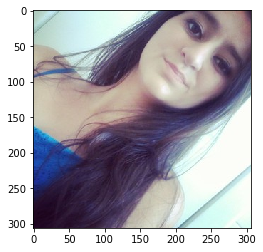

In [61]:
for i,img in enumerate(listNames):
    img = mpimg.imread("data/images/"+img+".jpg")
    print(i,isColor(img, 2))
    plt.imshow(img)
    plt.show()

In [81]:
def deltaRGB(image):    
    rg = image[:,:,0] - image[:,:,1]
    gb = image[:,:,1] - image[:,:,2]
    rb = image[:,:,0] - image[:,:,2]
    
    plt.imshow(rg)
    plt.show()
    plt.imshow(gb)
    plt.show()
    plt.imshow(rb)
    plt.show()
    plt.imshow(image)
    plt.show()

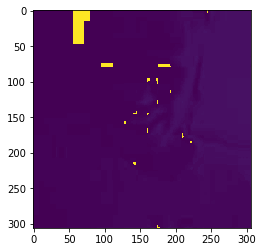

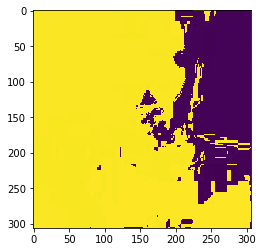

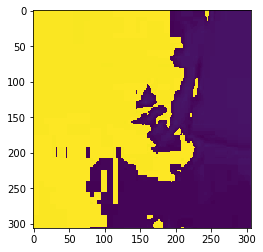

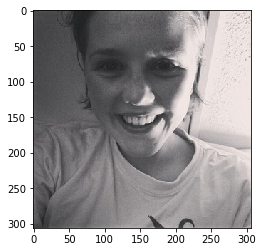

In [82]:
deltaRGB(mpimg.imread("data/images/"+list(listNames)[2]+".jpg"))